# Task 4

### Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

from nltk.corpus import stopwords
from wordcloud import WordCloud

## Load the Dataset

In [2]:
df = pd.read_csv("twitter_training.csv", header=None)
df.columns = ['ID', 'Topic', 'Sentiment', 'Tweet']

## View first five records

In [3]:
df.head()

,ID,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


## Dataset overview

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         74682 non-null  int64
 1   Topic      74682 non-null  str  
 2   Sentiment  74682 non-null  str  
 3   Tweet      73996 non-null  str  
dtypes: int64(1), str(3)
memory usage: 2.3 MB


In [5]:
df['Sentiment'].value_counts()

Sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

## Data Cleaning

In [6]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

## Text Preprocessing

stop_words = set(stopwords.words('english'))

def clean_tweet(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+|#\w+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text

df['Clean_Tweet'] = df['Tweet'].apply(clean_tweet)
df.head()


## Overall Sentiment Distribution

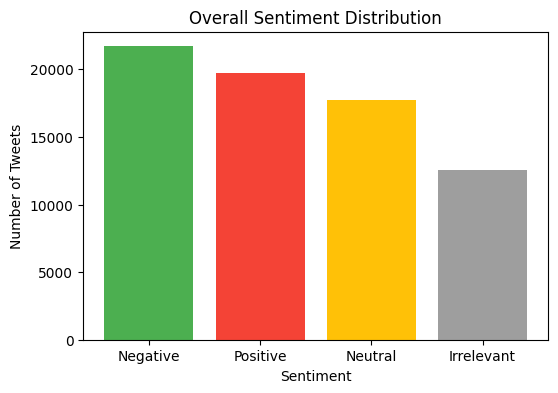

In [7]:
sentiment_count = df['Sentiment'].value_counts()

colors = ['#4CAF50', '#F44336', '#FFC107', '#9E9E9E']  

plt.figure(figsize=(6,4))
plt.bar(sentiment_count.index, sentiment_count.values, color=colors)
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.title("Overall Sentiment Distribution")
plt.show()

## Sentiment Distribution across Top Topics

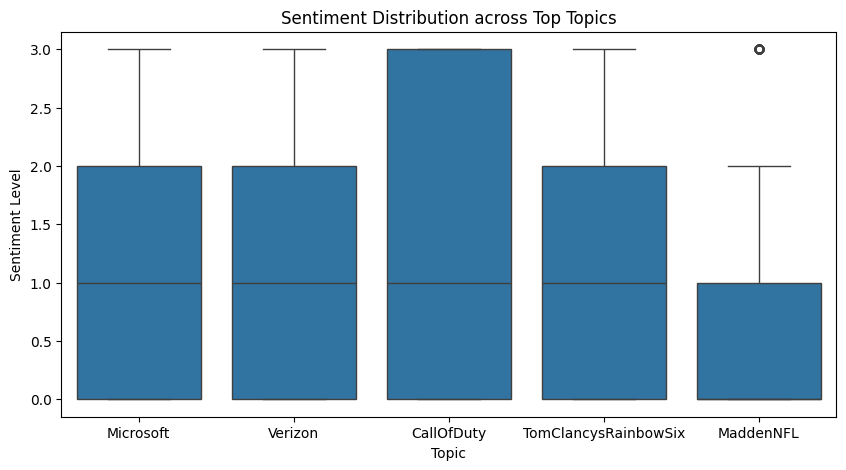

In [8]:
sentiment_map = {'Negative':0, 'Neutral':1, 'Positive':2, 'Irrelevant':3}
df['Sentiment_Num'] = df['Sentiment'].map(sentiment_map)

top_topics = df['Topic'].value_counts().head(5).index
filtered_df = df[df['Topic'].isin(top_topics)]

plt.figure(figsize=(10,5))
sns.boxplot(x='Topic', y='Sentiment_Num', data=filtered_df)
plt.title("Sentiment Distribution across Top Topics")
plt.xlabel("Topic")
plt.ylabel("Sentiment Level")
plt.show()